# [Model Based Collaborative Filtering](https://hipster4020.tistory.com/115?category=856880)

## [Latent Factor Model](https://wooono.tistory.com/149)

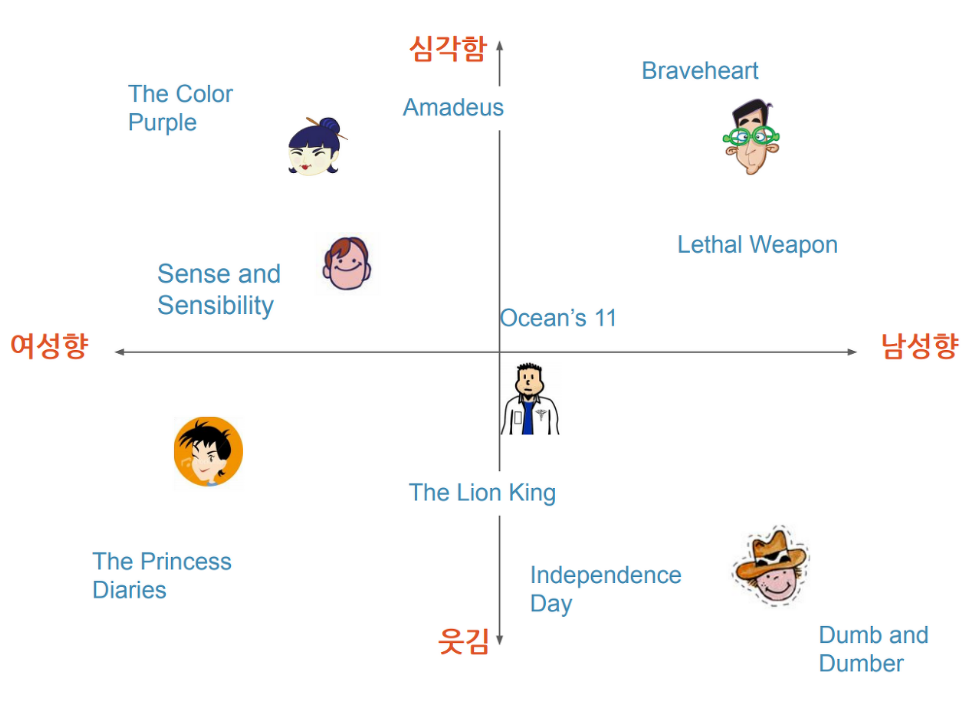

- Latent Factor Model은 사용자와 아이템을 잠재적인 차원(Factor)들을 사용해 나타낼 수 있다고 보는 모델입니다.  
- 여기서 차원은 축과 같은 의미로 사용될 수 있다.(위 이미지 참고)
  - x축을 남성향, 여성향의 정도로 표현하고 
  - y축을 웃기고, 심각함의 정도로 표현할 수 있다면 
  - 사용자와 아이템은 적절한 x,y축 값에 매핑 된다는 것을 알 수 있다.
- 위 예제에서는 사용자와 아이템을 두 가지 차원으로 표현했지만, 실제 Latent Factor Model에서는 사용자와 아이템을 잠제요인(알 수 없는) 차원으로 표현한다.
- 따라서 Latent Factor Model은 사용자의 매핑지점과 아이템의 매핑지점이 가까울 수록 유사하다고 판단하는 모델이다.

## Matrix Factorization

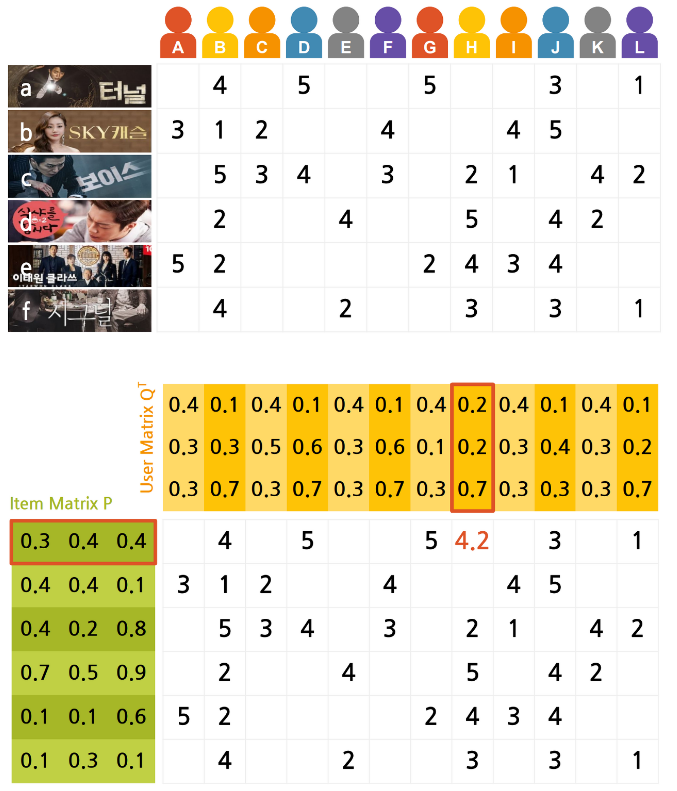

- Matrix Factorization은 Latent Factor Model을 구현하는 방법 중 하나이다.
- 우선, 각 사용자와 아이템을 같은 차원의 벡터들의 집합(Matrix)으로 표현한다. (Latent Factor Model)
  - 각 차원은 무엇을 의미하는지 모르며(잠재요인) 차원(rank)의 크기는 우리가 정할 수 있다.
  - 위 그림에서는 사용자와 아이템을 3차원 벡터들의 집합으로 표현했다. 
  - 처음에 Matrix를 랜덤 값으로 아무렇게나 채워놓는다.
  - 그럼, 모든 사용자와 모든 아이템에 대한 각각의 Matrix가 생기게 된다.

### Matrix Factorization 학습 원리
- 우리에게 이미 존재하는 몇몇의 요소값(평점)이 있을 것이다.
- "사용자 벡터와 아이템 벡터를 내적하면 요소값(평점)이 나올 것이다."라고 가정한 뒤 
  - 예측값 -> (0.3, 0.4, 0.4) * (0.2, 0.3, 0.7) = 4.6
- 사용자 벡터와 아이템 벡터의 내적값(예상평점)이 실제 평점값과 유사해지도록 두 개의 Matrix를 학습 시키면 된다.

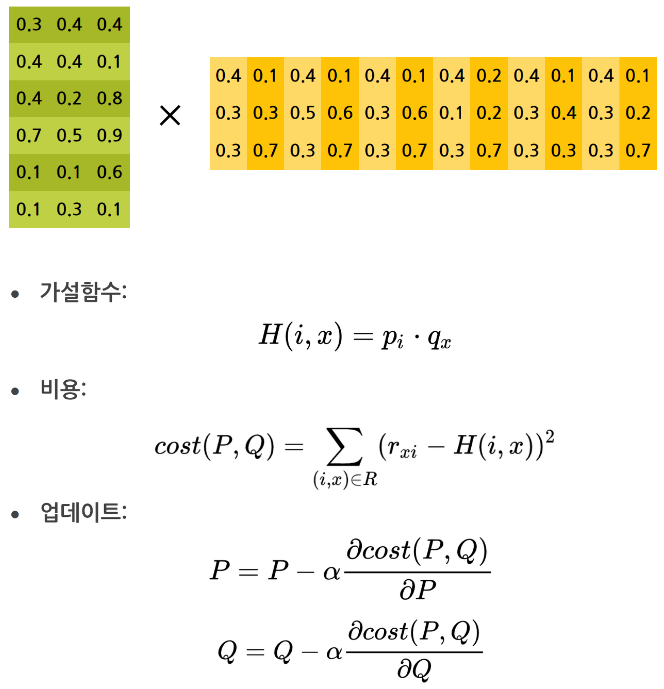

- 왼쪽 item matrix 를 p, 오른쪽 user matrix를 q라고 했을 때
  - p matrix에서 i 번째 벡터는 pi
  - q matrix에서 x 번째 벡터는 qx

  
1. 처음엔 각 Matrix를 랜덤 값으로 아무렇게나 채워놓는다.
2. 예측값을 도출하는 가설 함수는 벡터 내적을 의미하는 pi * qx로 사용한다.
3. 예측값과 실제값의 차이를 의미하는 비용 함수는 MSE를 사용한다.
4. 우리는 비용함수를 최소로 만드는 P Matrix와 Q Matrix를 찾는게 목표이다.

# [Surprise 설치](https://surpriselib.com/)
Surprise 라이브러리란, Python에 기반하며 Scikit-learn API와 비슷한 형태로 제공을 하여 추천 시스템 구현을 도와주는 편리한 라이브러리이다.  

Surprise를 이용한 추천 시스템은 데이터를 학습용과 테스트용 데이터 세트로 분리한 뒤 SVD 행렬 분해를 통한 잠재 요인 협업 필터링을 수행합니다.

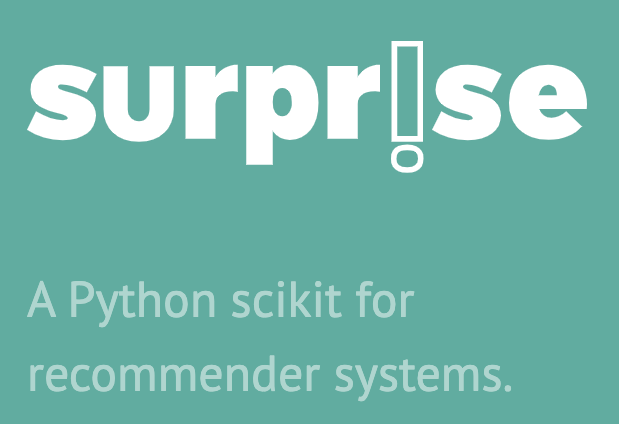

In [1]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095455 sha256=69f6ece6cbe2b0b246ec487cb0f0cacadb3010f1c7c32db45c0380e645955ceb
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
# Library import
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.dataset import DatasetAutoFolds

import os

# 맥os의 경우 라이브러리를 중복 사용해 오류가 발생할 수 있으므로 환경변수를 아래와 같이 설정한다.
os.environ['KMP_DUPLICATE_LIB_OK']='True'


import pandas as pd
from surprise import Reader

# 데이터 가공 및 변환

In [3]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [5]:
DATA_PATH = "/content/data/MyDrive/google_lecture/06. deep learning/4. RS Pytorch/data/Book reviews/"

books = pd.read_csv(DATA_PATH+'BX_Books.csv', sep= ';', encoding="latin-1")
ratings = pd.read_csv(DATA_PATH+'BX-Book-Ratings.csv', sep= ';', encoding="latin-1")

books.shape, ratings.shape 

((271379, 8), (1149780, 3))

In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Merge

In [8]:
bookratings = pd.merge(ratings, books, on='ISBN')
print(f'{bookratings.shape}')

(1031175, 10)


## Rename of Cols

In [9]:
bookratings.rename(columns={"ISBN":"item", "User-ID":"user", "Book-Rating":"rating"}, inplace=True)
books.rename(columns={"Book-Title":"title", "ISBN":"item"}, inplace=True)

In [10]:
bookratings.head()

,user,item,rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [11]:
books.head()

,item,title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


# 데이터 전처리

## Reader
- rating_scale(tuple optional)  
평점 값의 최소 ~ 최대 평점을 설정. 디폴트는 (1,5)  

In [12]:
from surprise import Reader

In [13]:
bookratings['rating'].min(), bookratings['rating'].max() 

(0, 10)

In [14]:
reader = Reader(rating_scale=(bookratings['rating'].min(), bookratings['rating'].max()))

In [15]:
reader

## Dataset

In [16]:
from surprise import Dataset

In [17]:
bookratings.columns

Index(['user', 'item', 'rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

In [18]:
cols = ['user', 'item', 'rating']
dataset = Dataset.load_from_df(bookratings[cols], reader)

## train_test_split

In [19]:
from surprise.model_selection import train_test_split

In [20]:
trainset, testset = train_test_split(dataset, test_size=0.25, random_state=0)

# SVD 행렬 분해 기법을 통한 추천

## 모델 생성

In [21]:
from surprise import SVD

In [22]:
# 수행 시마다 동일한 결과를 도출하기 위해 random_state 설정
algo = SVD(n_factors=50, random_state=0)

## 학습

In [23]:
# 학습 데이터 세트로 학습하고 나서 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset)

## 예측

In [24]:
predictions = algo.test(testset)

- uid: 사용자 아이디
- iid: 아이템 아이디
- r_ui: 실제 평점
- est: 예측 평점
- was_impossible: False(예측할 수 있음), True(예측할 수 없음)

In [25]:
predictions[0]

Prediction(uid=46222, iid='0070212570', r_ui=10.0, est=3.781022127175925, details={'was_impossible': False})

- `predictions[0].est`: 0번째 평점 예측 값 
즉 사용자(46222)가 아이템(0070212570)에 대한 실제 평점은 10점이지만, 모델이 예측한 값은 3.78임 

In [26]:
predictions[0].est, testset[0]

(3.781022127175925, (46222, '0070212570', 10.0))

## 평가

In [27]:
from surprise import accuracy

In [28]:
accuracy.rmse(predictions)

RMSE: 3.5493


3.5492923278260617

# Surprise를 이용한 개인화 도서 추천 시스템 

## 전체 데이터를 학습 데이터로 생성

In [29]:
full_trainset = dataset.build_full_trainset()

## 모델 생성

In [30]:
algo = SVD(n_epochs=20, n_factors=50, random_state=0)

## 학습

In [31]:
algo.fit(full_trainset)

## 추천 
특정 사용자(userid=9)를 지정하여 도서를 추천하기 위해 아직 보지 않은 도서 목록을 확인해보겠습니다.

In [40]:
bookratings.head(2)

,user,item,rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [41]:
bookratings[bookratings['user']==9].head()

,user,item,rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
70246,9,0440234743,0,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
87625,9,0452264464,6,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
185290,9,0609804618,0,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...,http://images.amazon.com/images/P/0609804618.0...


In [42]:
ISBNs = bookratings[bookratings['user']==9]['item']

In [45]:
print(len(ISBNs))
print(type(ISBNs))

ISBNs # 사용자 아이디 9가 본 책 리스트 

3
<class 'pandas.core.series.Series'>


70246     0440234743
87625     0452264464
185290    0609804618
Name: item, dtype: object

In [50]:
len(ISBNs[ISBNs=='034545104X']), ISBNs[ISBNs=='034545104X'].count()

(0, 0)

In [51]:
print(f"034545104X: {len(ISBNs[ISBNs=='034545104X'])} / 0440234743: {len(ISBNs[ISBNs=='0440234743'])}")

034545104X: 0 / 0440234743: 1


In [52]:
if ISBNs[ISBNs=='034545104X'].count() == 0:
  print('사용자 아이디 9는 ISBN ''034545104X''의 평점 없음')

사용자 아이디 9는 ISBN 034545104X의 평점 없음


In [54]:
# 도서에 대한 상세 속성 정보 DataFrame 로딩
books[books['item']=='034545104X']

,item,title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2966,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


## 추천 결과
- uid: 사용자 아이디 
- iid: 아이탬 

In [55]:
uid = str(9)
iid = str('034545104X')

pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 034545104X r_ui = None   est = 2.65   {'was_impossible': False}


In [57]:
pred

Prediction(uid='9', iid='034545104X', r_ui=None, est=2.6530989148522495, details={'was_impossible': False})

예측 평점

In [38]:
pred.est

2.6530989148522495